<a href="https://colab.research.google.com/github/Aparna-981/ict-project/blob/main/HR_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.ensemble import RandomForestClassifier


# load dataset

In [55]:
train_data=pd.read_csv("/content/train_LZdllcl.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


#EDA

In [56]:
train_data.shape

(54808, 14)

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [58]:
train_data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [59]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [60]:
train_data.duplicated().sum()

np.int64(0)

In [61]:
categorical_data = list(train_data.select_dtypes(include=["object"]).columns)
numerical_data = list(train_data.select_dtypes(include=["number"]).columns)

categorical_data, numerical_data


(['department', 'region', 'education', 'gender', 'recruitment_channel'],
 ['employee_id',
  'no_of_trainings',
  'age',
  'previous_year_rating',
  'length_of_service',
  'KPIs_met >80%',
  'awards_won?',
  'avg_training_score',
  'is_promoted'])

# missing value handling

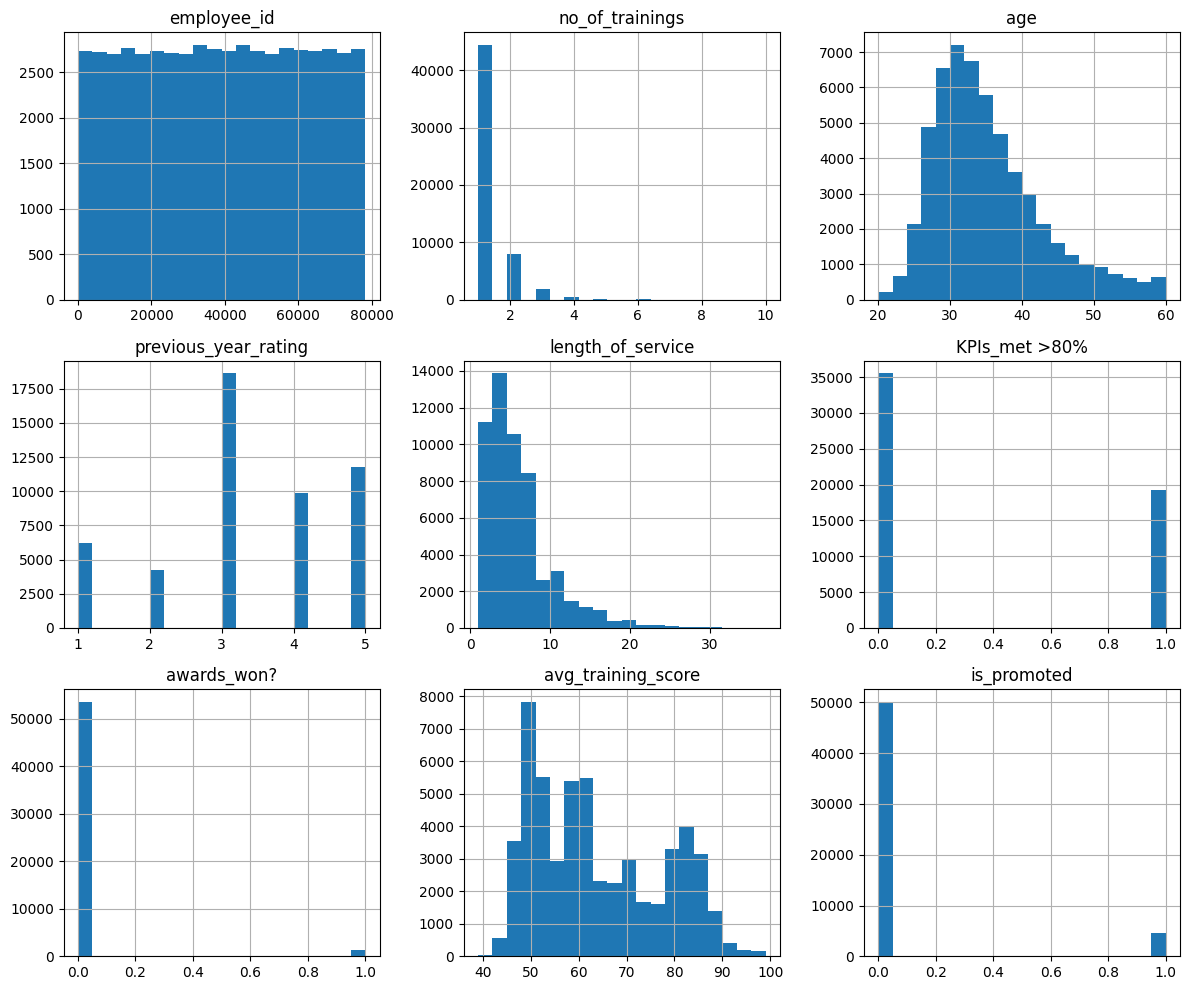

In [62]:
train_data.select_dtypes(include=["number"]).hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()


In [63]:
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data['previous_year_rating'].median())

In [64]:
train_data['education'] = train_data['education'].fillna(train_data['education'].mode()[0])


In [65]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


# outlier handling

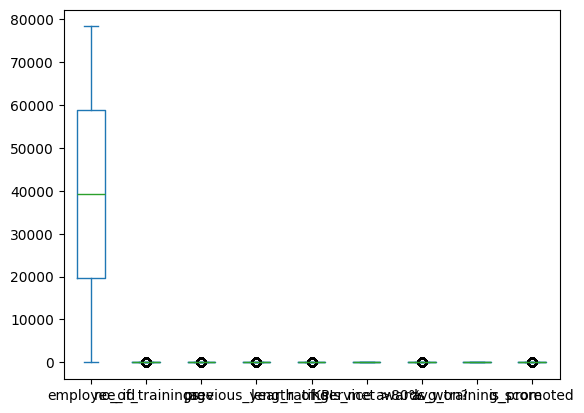

In [66]:
train_data.plot(kind='box');


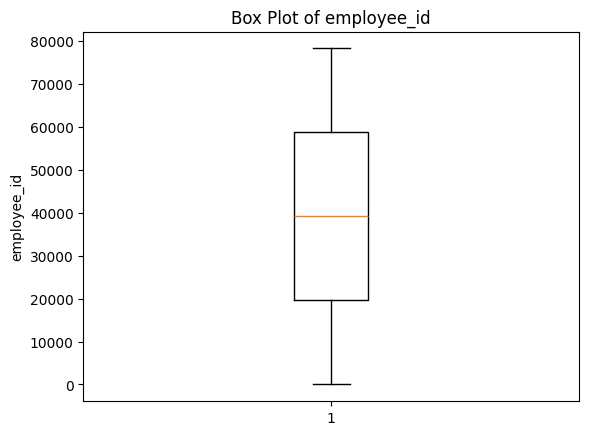

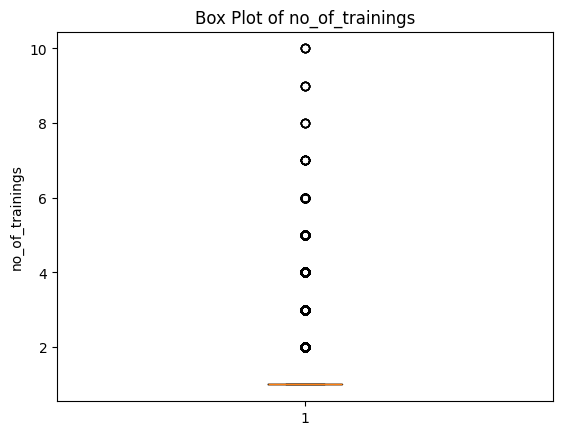

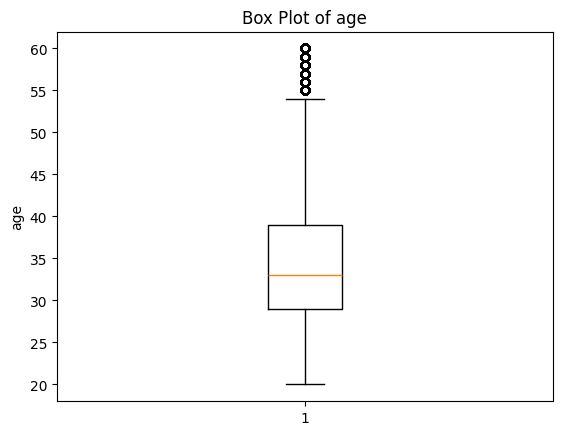

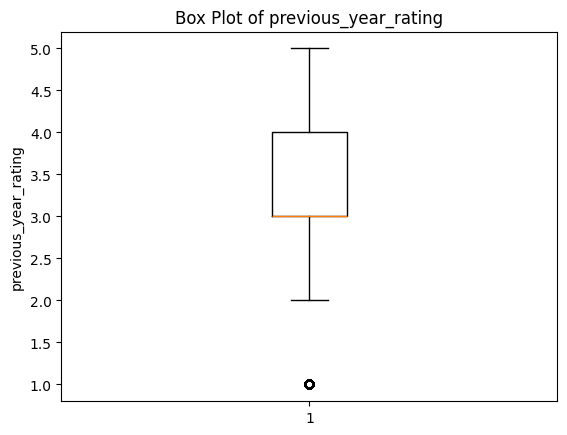

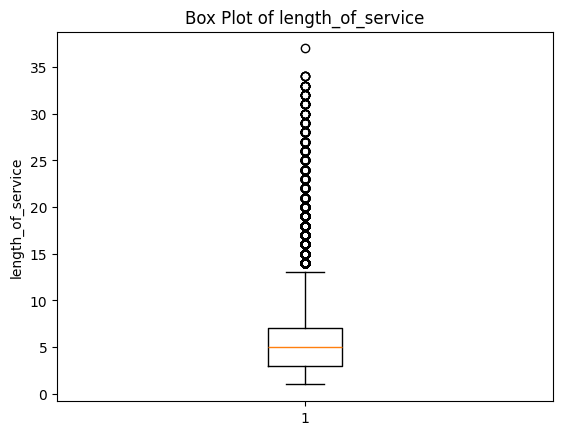

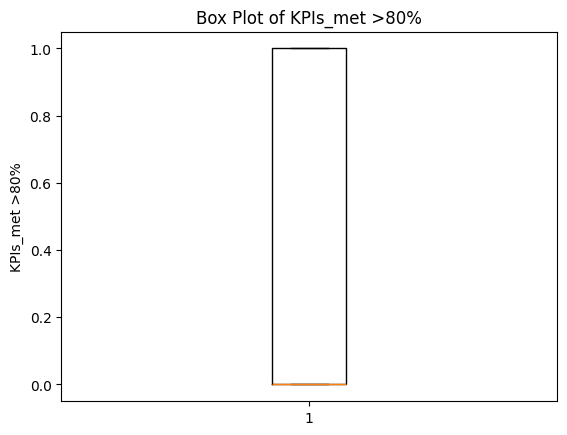

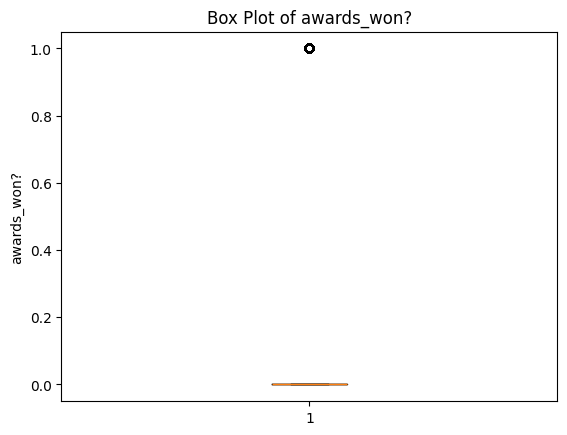

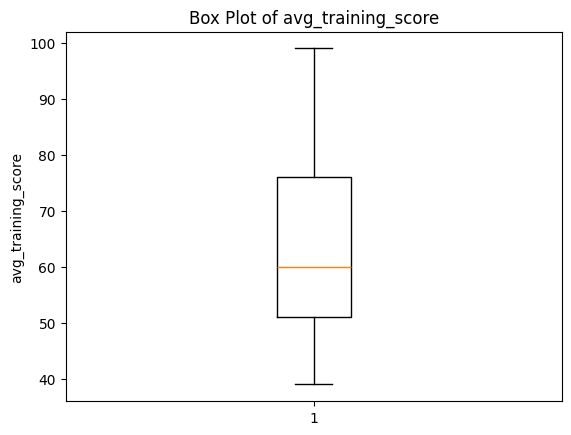

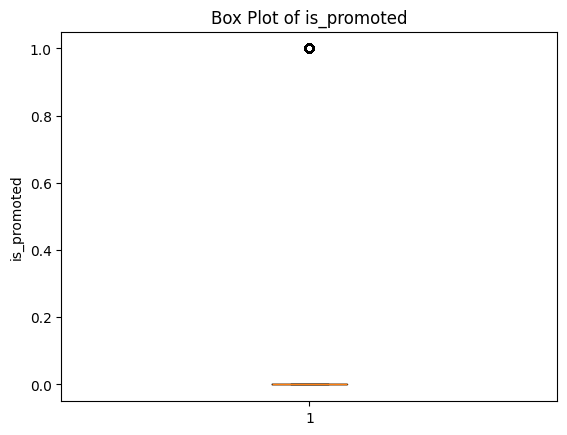

In [67]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    plt.boxplot(train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [68]:
train_data.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [69]:
train1 = train_data[numerical_data]
corr = train1.corr()
corr


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


<Axes: >

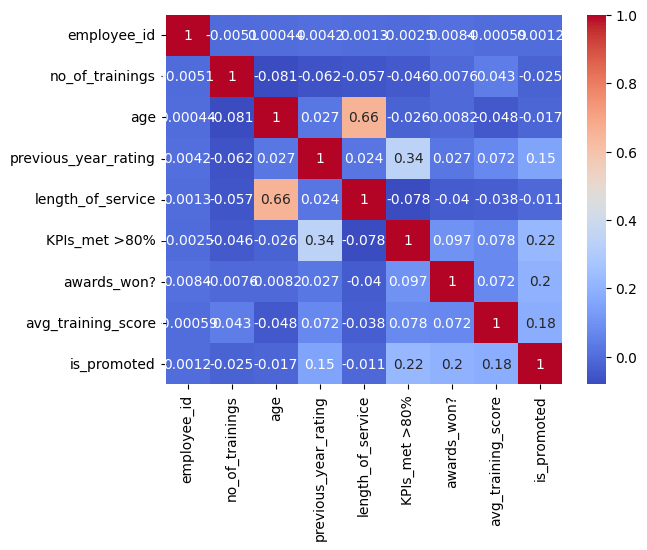

In [70]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Encoding

In [71]:
#train_encode= pd.get_dummies(train_data, columns=categorical_data, drop_first=True, dtype=int)


In [72]:
train_encode = pd.get_dummies(train_data, drop_first=True)
X = train_encode.drop(["employee_id","is_promoted"], axis=1)
y = train_encode["is_promoted"]

In [73]:
train_encode

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,False,...,False,False,True,False,False,False,True,False,False,True
1,65141,1,30,5.0,4,0,0,60,0,False,...,False,False,False,False,False,False,False,True,False,False
2,7513,1,34,3.0,7,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,True
3,2542,2,39,1.0,10,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,False
4,48945,1,45,3.0,2,0,0,73,0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,48,3.0,17,0,0,78,0,False,...,False,False,False,False,False,False,False,True,False,True
54804,74592,1,37,2.0,6,0,0,56,0,False,...,False,False,False,False,False,False,True,False,False,False
54805,13918,1,27,5.0,3,1,0,79,0,False,...,False,False,False,False,False,False,False,True,False,False
54806,13614,1,29,1.0,2,0,0,45,0,False,...,False,False,False,False,True,False,False,True,False,True


In [74]:
train_encode.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# SPLIT X AND Y

In [75]:
X= train_encode.drop(["employee_id", "is_promoted"], axis=1)
y = train_encode["is_promoted"]

# Scaling

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

In [77]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# 1.logistic regression

In [80]:


# split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

# model (handle imbalance)
log_reg_model = LogisticRegression(max_iter=1000, class_weight="balanced")

# train
log_reg_model.fit(X_train_scaled, y_train)

# predict
y_pred = log_reg_model.predict(X_val_scaled)
y_prob = log_reg_model.predict_proba(X_val_scaled)[:,1]

# metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.7640029191753329
Precision: 0.2406652023846878
Recall: 0.8211991434689507
F1-score: 0.3722397476340694
ROC-AUC: 0.8763909661086005
Confusion Matrix:
 [[7608 2420]
 [ 167  767]]


# 2. KNN

### Euclidean

In [82]:

roc_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')

    classifier.fit(X_train_scaled, y_train)

    y_prob = classifier.predict_proba(X_val_scaled)[:,1]

    roc = roc_auc_score(y_val, y_prob)

    roc_list.append(roc)

best_k = neighbors_range[np.argmax(roc_list)]
print("Best k:", best_k)

# train final KNN
KNN_classifier = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='distance')
KNN_classifier.fit(X_train_scaled, y_train)

# evaluate
y_pred_knn = KNN_classifier.predict(X_val_scaled)
y_prob_knn = KNN_classifier.predict_proba(X_val_scaled)[:,1]

print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall:", recall_score(y_val, y_pred_knn))
print("F1-score:", f1_score(y_val, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

Best k: 19
Accuracy: 0.9116949461777047
Precision: 0.25
Recall: 0.018201284796573874
F1-score: 0.033932135728542916
ROC-AUC: 0.7777102058561509
Confusion Matrix:
 [[9977   51]
 [ 917   17]]


# manhattan

In [83]:
roc_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights='distance')

    classifier.fit(X_train_scaled, y_train)

    y_prob = classifier.predict_proba(X_val_scaled)[:,1]

    roc = roc_auc_score(y_val, y_prob)

    roc_list.append(roc)

best_k = neighbors_range[np.argmax(roc_list)]
print("Best k:", best_k)

# train final KNN
KNN_classifier = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan', weights='distance')
KNN_classifier.fit(X_train_scaled, y_train)

# evaluate
y_pred_knn = KNN_classifier.predict(X_val_scaled)
y_prob_knn = KNN_classifier.predict_proba(X_val_scaled)[:,1]

print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Precision:", precision_score(y_val, y_pred_knn))
print("Recall:", recall_score(y_val, y_pred_knn))
print("F1-score:", f1_score(y_val, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

Best k: 19
Accuracy: 0.9116037219485496
Precision: 0.23880597014925373
Recall: 0.017130620985010708
F1-score: 0.03196803196803197
ROC-AUC: 0.7802117134122959
Confusion Matrix:
 [[9977   51]
 [ 918   16]]


# 3. Navie Baye's

In [87]:
#initializing the model
navie_bayes_classifier =GaussianNB()
#training the model
navie_bayes_classifier.fit(X_train_scaled,y_train)
#Evaluate the ML model
y_pred_nb = navie_bayes_classifier.predict(X_val_scaled)

# Evaluate on validation set
Acc_nb = accuracy_score(y_val, y_pred_nb)
pred_nb = precision_score(y_val, y_pred_nb)
Rec_nb = recall_score(y_val, y_pred_nb)
f1_nb = f1_score(y_val, y_pred_nb)

print("Accuracy:", Acc_nb)
print("Precision:", pred_nb)
print("Recall:", Rec_nb)
print("F1-score:", f1_nb)
confusion_matrix(y_val, y_pred_nb)

Accuracy: 0.5913154533844189
Precision: 0.14454691259021651
Recall: 0.771948608137045
F1-score: 0.24349881796690306


array([[5761, 4267],
       [ 213,  721]])

# 4. Decision Tree

In [134]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
y_pred_dt = DT_classifier.predict(X_val)
y_prob_dt = DT_classifier.predict_proba(X_val)[:,1]


Acc_dt = accuracy_score(y_val, y_pred_dt)
prec_dt = precision_score(y_val, y_pred_dt, average='binary')  # use 'binary' if binary classification
Rec_dt = recall_score(y_val, y_pred_dt, average='binary')
f1_dt = f1_score(y_val, y_pred_dt, average='binary')
roc_dt = roc_auc_score(y_val, y_prob_dt)
cm_dt = confusion_matrix(y_val, y_pred_dt)

print("=== Decision Tree ===")
print("Accuracy:", Acc_dt)
print("Precision:", prec_dt)
print("Recall:", Rec_dt)
print("F1-score:", f1_dt)
print("Confusion Matrix:\n", cm_dt)

=== Decision Tree ===
Accuracy: 0.8968253968253969
Precision: 0.40446168768186225
Recall: 0.4464668094218415
F1-score: 0.42442748091603055
Confusion Matrix:
 [[9414  614]
 [ 517  417]]


In [146]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# train
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_val)
y_prob = rf_model.predict_proba(X_val)[:, 1]

# metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1-score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.7147418354314906
Precision: 0.21121938372399263
Recall: 0.8586723768736617
F1-score: 0.33904037201437326
ROC-AUC: 0.8702351830292739
Confusion Matrix:
 [[7033 2995]
 [ 132  802]]


# Model Fine-Tuning

In [97]:
random_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions={
        'n_neighbors': [3,5,7,9,11],
        'weights': ['uniform','distance'],
        'metric': ['euclidean','manhattan']
    },
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_knn.fit(X_train_scaled, y_train)
best_knn = random_knn.best_estimator_

print("Best Parameters:", random_knn.best_params_)
print("Best CV ROC-AUC:", random_knn.best_score_)

y_pred_knn = best_knn.predict(X_val_scaled)
y_prob_knn = best_knn.predict_proba(X_val_scaled)[:, 1]

print("Test Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Test ROC-AUC:", roc_auc_score(y_val, y_prob_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))

Best Parameters: {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}
Best CV ROC-AUC: 0.7331812242357373
Test Accuracy: 0.9136106549899653
Test ROC-AUC: 0.746710655560576
Confusion Matrix:
 [[10000    28]
 [  919    15]]


In [129]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

param_distributions = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga', 'liblinear']
}

random_logreg = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_logreg.fit(X_train_scaled, y_train)
best_logreg = random_logreg.best_estimator_

print("Best Parameters:", random_logreg.best_params_)
print("Best CV ROC-AUC:", random_logreg.best_score_)

y_pred_logreg = best_logreg.predict(X_val_scaled)
y_prob_logreg = best_logreg.predict_proba(X_val_scaled)[:, 1]

print("Test Accuracy:", accuracy_score(y_val, y_pred_logreg))
print("Test ROC-AUC:", roc_auc_score(y_val, y_prob_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_logreg))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_p

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 1}
Best CV ROC-AUC: 0.8755159521616043
Test Accuracy: 0.7661923006750593
Test ROC-AUC: 0.8770271932379489
Confusion Matrix:
 [[7634 2394]
 [ 169  765]]


In [98]:
best_knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=11)

# Test data

In [99]:
test_data=pd.read_csv("/content/test_2umaH9m.csv")
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [101]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [128]:
test_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0



# handle null value

In [102]:
test_data['previous_year_rating']=test_data['previous_year_rating'].fillna(test_data['previous_year_rating'].median())

In [103]:
test_data['education'] = test_data['education'].fillna(test_data['education'].mode()[0])


In [105]:
categorical_test = list(test_data.select_dtypes(include=["object"]).columns)
numerical_test = list(test_data.select_dtypes(include=["number"]).columns)

categorical_test, numerical_test


(['department', 'region', 'education', 'gender', 'recruitment_channel'],
 ['employee_id',
  'no_of_trainings',
  'age',
  'previous_year_rating',
  'length_of_service',
  'KPIs_met >80%',
  'awards_won?',
  'avg_training_score'])

# encoding

In [150]:
test_data_encode=pd.get_dummies(test_data, drop_first=True, dtype=int)


In [151]:
test_data_encode = test_data_encode.reindex(columns=X.columns, fill_value=0)


In [152]:
test_data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               23490 non-null  int64  
 1   age                           23490 non-null  int64  
 2   previous_year_rating          23490 non-null  float64
 3   length_of_service             23490 non-null  int64  
 4   KPIs_met >80%                 23490 non-null  int64  
 5   awards_won?                   23490 non-null  int64  
 6   avg_training_score            23490 non-null  int64  
 7   department_Finance            23490 non-null  int64  
 8   department_HR                 23490 non-null  int64  
 9   department_Legal              23490 non-null  int64  
 10  department_Operations         23490 non-null  int64  
 11  department_Procurement        23490 non-null  int64  
 12  department_R&D                23490 non-null  int64  
 13  d

# scaling

In [153]:
X_test = test_data_encode

In [154]:
X_test_scaled  = scaler.transform(X_test)


In [155]:
test_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
test_predictions = best_knn.predict(X_test_scaled)


In [157]:
test_pred = log_reg_model.predict(X_test_scaled)

In [174]:
final_threshold = 0.20   # choose best from validation

test_pred = (test_probs >= final_threshold).astype(int)


In [159]:
sample = pd.read_csv("/content/sample_submission_M0L0uXE.csv")

sample["is_promoted"] = test_predictions
sample.to_csv("final_submission.csv", index=False)


In [166]:
submission = pd.DataFrame({
    "employee_id": test_data["employee_id"],
    "is_promoted": test_pred
})

submission.to_csv("final_submission1.csv", index=False)

In [176]:
submission = pd.DataFrame({
    "employee_id": test_data["employee_id"],
    "is_promoted": test_pred  # DO NOT threshold
})

submission.to_csv("rf_submission.csv", index=False)


In [165]:
print(X.shape)
print(test_data_encode.shape)
print((X.columns == test_data_encode.columns).all())


(54808, 53)
(23490, 53)
True
